http://cs229.stanford.edu/ps/ps2/ps2.pdf

# (a)

The most notable difference is that training of data_b doesn't seem to converge, but that of data_a does.

# (b)

In [2]:
def add_intercept(X_):
    m, n = X_.shape
    X = np.zeros((m, n + 1))
    X[:, 0] = 1
    X[:, 1:] = X_
    return X

def load_data(filename):
    D = np.loadtxt(filename)
    Y = D[:, 0]
    X = D[:, 1:]
    return add_intercept(X), Y

def calc_grad(X, Y, theta):
    m, n = X.shape
    grad = np.zeros(theta.shape)

    margins = Y * X.dot(theta)
    probs = 1. / (1 + np.exp(margins))
    grad = -(1./m) * (X.T.dot(probs * Y))

    return grad


def logloss(X, Y, theta):
    Y_copy = Y.copy()
    Y_copy[Y_copy == -1] = 0
    pred_probs = 1 / (1 + np.exp(- X.dot(theta)))
    epsilon = 1e-16
    return - np.sum(Y_copy * np.log(pred_probs + epsilon) + (1 - Y_copy) * np.log(1 - pred_probs + epsilon))
    

def logistic_regression(X, Y):
    m, n = X.shape
    theta = np.zeros(n)
    learning_rate = 10

    i = 0
    thetas = []
    errors = []
    while True:
        i += 1
        prev_theta = theta
        grad = calc_grad(X, Y, theta)
        theta = theta  - learning_rate * (grad)
        if i % 10000 == 0:
            print('Finished {0} iterations; logloss: {1}'.format(i, logloss(X, Y, theta)))
            thetas.append(theta)
        error = np.linalg.norm(prev_theta - theta)
        errors.append(error)
        if error < 1e-15:
            print('Converged in %d iterations' % i)
            break
        if i == 5 * 10000:
            break
    return thetas, errors

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
dfa = pd.read_csv('http://cs229.stanford.edu/ps/ps2/data_a.txt', header=None, sep=' ', names=['label', 'x1', 'x2'])

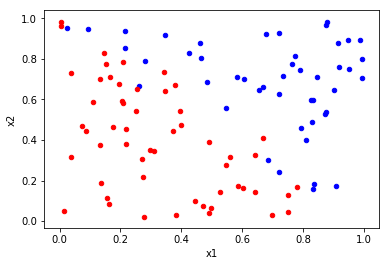

In [5]:
ax = plt.axes()

dfa.query('label ==  1').plot.scatter(x='x1', y='x2', ax=ax, color='blue')
dfa.query('label == -1').plot.scatter(x='x1', y='x2', ax=ax, color='red')

In [6]:
dfb = pd.read_csv('http://cs229.stanford.edu/ps/ps2/data_b.txt', header=None, sep=' ', names=['label', 'x1', 'x2'])

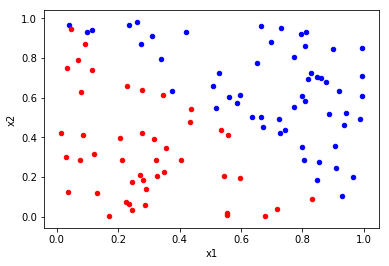

In [7]:
ax = plt.axes()

dfb.query('label ==  1').plot.scatter(x='x1', y='x2', ax=ax, color='blue')
dfb.query('label == -1').plot.scatter(x='x1', y='x2', ax=ax, color='red')

In [11]:
Xa, Ya = load_data('data_a.txt')
tha, erra = logistic_regression(Xa, Ya)

Finished 10000 iterations; logloss: 15.98874822112764
Finished 20000 iterations; logloss: 15.98874821838721
Finished 30000 iterations; logloss: 15.988748218387205
Converged in 30395 iterations


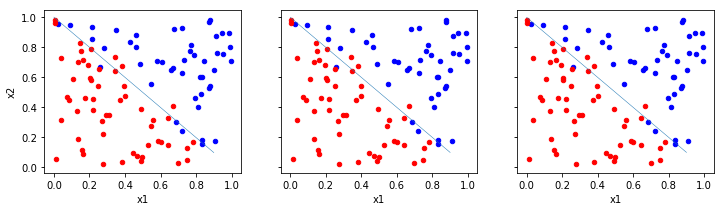

In [12]:
fig, axes = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(12, 3))
axes = axes.ravel()

for k, theta in enumerate(thetas[:3]):
    ax = axes[k]
    xs = np.arange(0, 1, 0.1)
    ys = (-theta[0] - theta[1] * xs) / theta[2]
    ax.plot(xs, ys, lw=0.5)
    dfa.query('label ==  1').plot.scatter(x='x1', y='x2', ax=ax, color='blue')
    dfa.query('label == -1').plot.scatter(x='x1', y='x2', ax=ax, color='red')

In [13]:
Xb, Yb = load_data('data_b.txt')

In [14]:
thetas, errors = logistic_regression(Xb, Yb)

Finished 10000 iterations; logloss: 3.045092224758587
Finished 20000 iterations; logloss: 2.32556706272674
Finished 30000 iterations; logloss: 1.9655254432929143
Finished 40000 iterations; logloss: 1.7379713038351392
Finished 50000 iterations; logloss: 1.5770732018729934


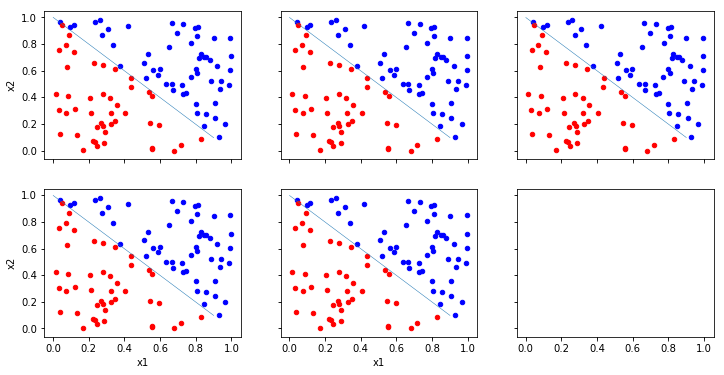

In [16]:
fig, axes = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(12, 6))
axes = axes.ravel()

for k, theta in enumerate(thetas[:9]):
    ax = axes[k]
    xs = np.arange(0, 1, 0.1)
    ys = (-theta[0] - theta[1] * xs) / theta[2]
    ax.plot(xs, ys, lw=0.5)
    dfb.query('label ==  1').plot.scatter(x='x1', y='x2', ax=ax, color='blue')
    dfb.query('label == -1').plot.scatter(x='x1', y='x2', ax=ax, color='red')

The reason why it takes so long for LR to converge is because of their perfect linearly separability (even at the early stage), after which the algorithm is just trying to increase the scale of theta so as to increase $|\theta^Tx|$, which would lead to higher probability, hence higher likelihood.

In the case of perfect separation, the theorectical maximum likelihood is 1, so untill theta reaches infinity, won't the algorithm stop.

This doesn't happen to A because it's not linearly separable.

# (c)

i. Using a different constant learning rate.

**Ans:** No, as the $\theta$ still needs to go to infinite to make maximum likelihood. However, it's may reach the numeric infinite (e.g. 1e15) faster if the learning rate is huge.

ii. Decreasing the learning rate over time (e.g. scaling the initial learning rate by $1/t^2$, where $t$ is the number of gradient descent iterations thus far).

**Ans:** No, this is not a problem caused by learning rate being too big.

iii. Adding a regularization term $||θ||^2_2$ to the loss function.

**Ans:** Yes, thus $\theta$ won't be scaled to infinitely large.

iv. Linear scaling of the input features.

**Ans:** No, scaling input features is irrelevant to $\theta$ getting infinitely large.

v. Adding zero-mean Gaussian noise to the training data or labels

**Ans:** Not totally sure, but don't think so.

# (d)

Dataset B won't cause a problem for SVM because in SVM, $||\theta||$ has to be $1$, so this problem has already been taken care of during its development.